<img align="left" style="width: 170px;" src="udea_escudo.png">

# Laboratorio 2 PDS 2020-1
### Yorguin José Mantilla Ramos
CC.1127617499
 
Grupo:3


### 2 Analisis de pulsos de radar

#### 2.1 Genere un pulso rectangular de 20 muestras. Tip: Utilice la función de numpy np.ones(20).

In [1]:
import numpy as np

rect = np.ones(20)


#### 2.2  Calcule y grafique la función de autocorrelación del pulso generado.

Y:\code\pds_lab\Lab3_PDS_Mantilla_Yorguin\my_utils.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  foo(x,y)


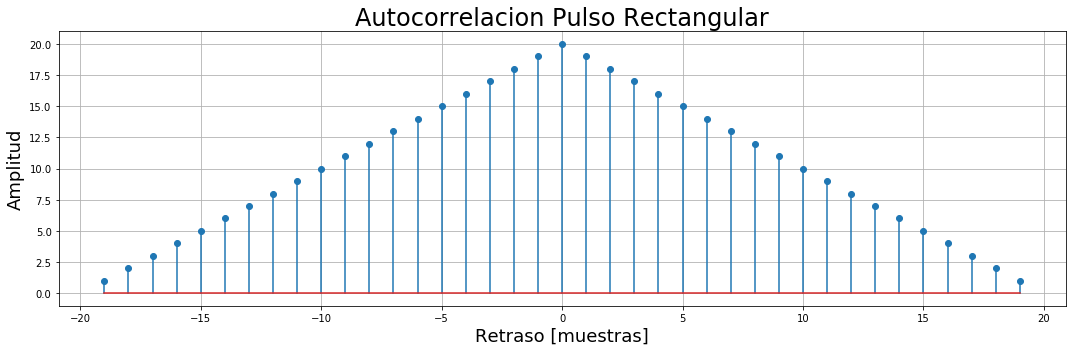

In [2]:
import my_utils as mu
import matplotlib.pyplot as plt


rect_autocorr = np.correlate(rect, rect, mode='full')
tau_vector = np.arange(-len(rect)+1,len(rect),1) # vector de retraso

mu.plot_signal(tau_vector,rect_autocorr,stem=True,xlabel='Retraso [muestras]',ylabel='Amplitud',title='Autocorrelacion Pulso Rectangular')

Conclusiones

- En el retraso nulo (retraso=0) esta la mayor amplitud de la correlación ya que la señal es exactamente igual a ella misma en ese punto.
- A medida que el retraso aumenta en su valor absoluto la autocorrelacion disminuye ya que la señal deja de parecerse a su version desplazada en tiempo.
- Como la señal no es períodica no se observan más picos en la autocorrelación.

#### 2.3 Utilice la función delay noise incluida en la librer´ıa adjunta ’utils.py’ para simular el ruido introducido por el canal, y el desfase de la se˜ nal recibida respecto a la original. Grafique el resultado, ¿Es capaz de distinguir el pulso y decir cuanto es su retraso?

Y:\code\pds_lab\Lab3_PDS_Mantilla_Yorguin\my_utils.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  foo(x)
C:\software\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


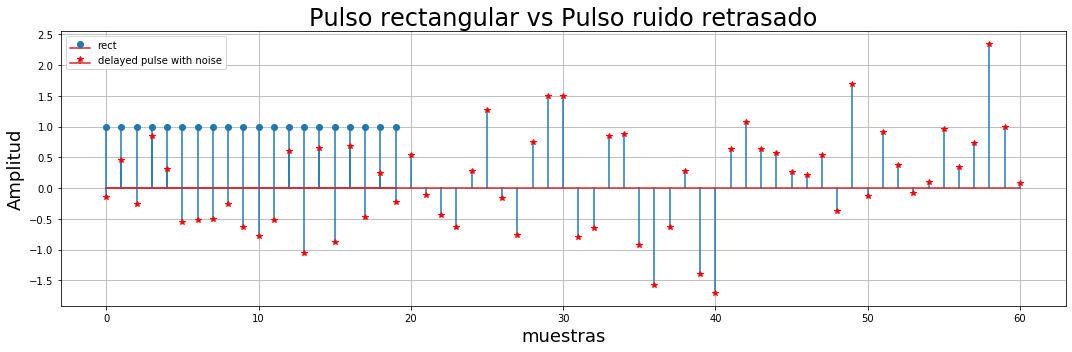

In [3]:
from utils import delay_noise

delayed_pulse = delay_noise(rect)

fig,ax = mu.plot_signal(rect,stem=True,xlabel='muestras',
                        ylabel='Amplitud',title='Pulso rectangular vs Pulso ruido retrasado',ret=True,show=False)
ax.stem(delayed_pulse,markerfmt='r*')
ax.legend(['rect','delayed pulse with noise'])
plt.tight_layout()
plt.show()


Conclusiones

- No se ve claramente cuanto es el desfase ya que la magnitud de la distribución del ruido generado es de 0.8 que es comparable con 1, por lo que el pulso se hace casi indistinguible entre el ruido
- Esto se puede pensar como que el SNR es muy bajo

#### 2.4  Utilice la función de numpy np.correlate para hallar la correlación entre la señal distorsionada y la señal original. Muestre el resultado gráficamente ¿Cuál es el retraso? ¿Que se puede concluir?

Y:\code\pds_lab\Lab3_PDS_Mantilla_Yorguin\my_utils.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  foo(x)


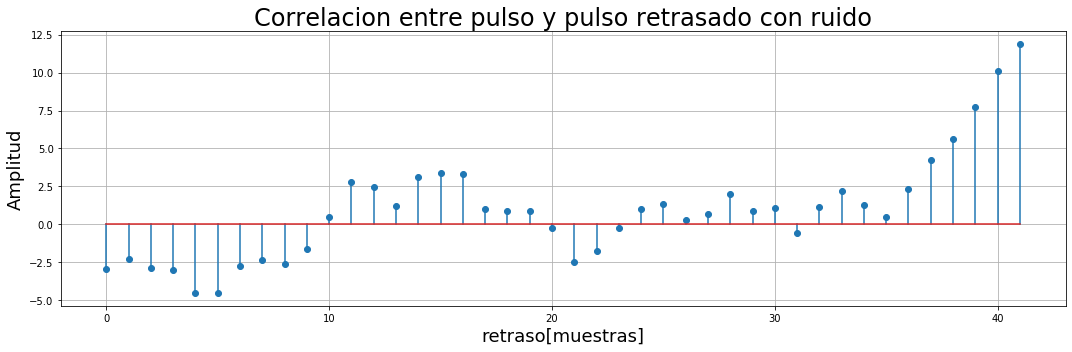

delay: 41


In [4]:
xcorr = np.correlate(delayed_pulse,rect,mode='valid')

# en modo valid solo acepta el resultado cuando hay overlap completo entre las señales
# es decir el pulso esta totalmente dentro del pulso con ruido retrasado
# el primer instante donde esto pasa es cuando el retraso es de 0 , por lo que ese es el comienzo del eje
# el ultimo instante es donde la señales dejan de tener overlap 

fig,ax = mu.plot_signal(xcorr,stem=True,xlabel='retraso[muestras]',
                        ylabel='Amplitud',title='Correlacion entre pulso y pulso retrasado con ruido',ret=True,show=False)
#ax.stem(delayed_pulse,markerfmt='r*')
#ax.legend(['rect','delayed pulse with noise'])
plt.tight_layout()
plt.show()

print('delay:',np.argmax(xcorr))


Conclusiones

- El delay es el número indicado arriba ya que ahí es donde se ve el pico de la función de correlación cruzada
- Interpretar el eje temporal de el resultado de una autocorrelación puede ser complicado. En el caso de np.correlate esta interpretacion varía según el modo de operación que se uso. En este caso se uso el modo valid ya que sé que el eje de tiempo en ese modo debe iniciar en cero (ya que a partir de ahí es que el solapamiento es completo).
- De esta manera vemos que con la correlación cruzada podemos detectar señales conocidas (el pulso) que pasaron a traves de un medio ruidoso y con retraso.

### 3 Analisis de Electroencefalograma (EEG)

#### 3.0 Cargue el archivo eeg.npy con numpy.load , para cada canal normalice en amplitud y elimine el nivel DC.

Luego escoja el canal de acuerdo al ultimo numero de su c´ edula a partir de la siguiente lista:

1. Canal 21
3. Canal 4
5. Canal 9
7. Canal 14
9. Canal 19

Finalmente grafique el canal elegido con y sin normalización usando subplot para una fácil comparación.

¿Que observa? Describa brevemente la diferencia entre las gráficas.

channel mean: 0.3409365472240003


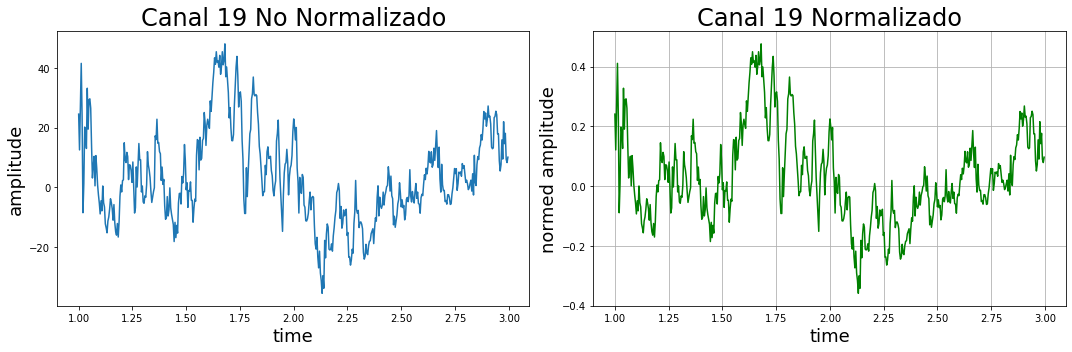

In [5]:
my_file = 'eeg.npy'
raw = np.load(my_file)
my_channel = 19
fs =  250

# Eliminar DC a cada canal por separado (cada uno con su DC particular)
raw_noDC = raw - np.mean(raw,axis=-1,keepdims=True)
print('channel mean:',np.mean(raw[my_channel]))

# Normalizar cada canal por el maximo valor absoluto del canal
raw_norm = np.divide(raw_noDC,np.max(np.abs(raw_noDC),axis=-1,keepdims=True))

time = np.arange(0,raw.shape[1]/fs,1/fs)


start = mu.s2f(1,fs)
stop = mu.s2f(3,fs)
fig,axs = mu.plot_signal(time[start:stop],raw[my_channel,start:stop],xlabel='time',
                         title='Canal ' +str(my_channel) + ' No Normalizado',
                         ylabel='amplitude',ret=True,show=False,format='-',
                         subplots=(1,2),size=(15,5))
axs[1].plot(time[start:stop],raw_norm[my_channel,start:stop],'g-')
axs[1].set_title('Canal ' +str(my_channel) + ' Normalizado',fontsize=24)
axs[1].set_xlabel('time',fontsize=18)
axs[1].set_ylabel('normed amplitude',fontsize=18)
plt.tight_layout()
plt.show()

eeg = raw_norm.copy()


Conclusiones
- La señal se escalo al intervalo [-1,1] y esto se nota bastante es las graficas por los ejes de amplitud.
- Se escalo practicamente a 100 veces menor.
- La media de los canales al ser muy baja no influyó mucho por lo que no se nota muy bien ese desplazamiento DC.

#### 3.1. Coeficiente de correlación entre canales

##### 3.1.1 Ahora calcule el coeficiente de correlación entre el canal que le corresponde y los otros canales. 
Finalmente, grafique estos coeficientes de correlación (deben ser 25) utilizando la función plt.stem.
Tip: Use la función np.corrcoef para calcular los coeficientes.

C:\software\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


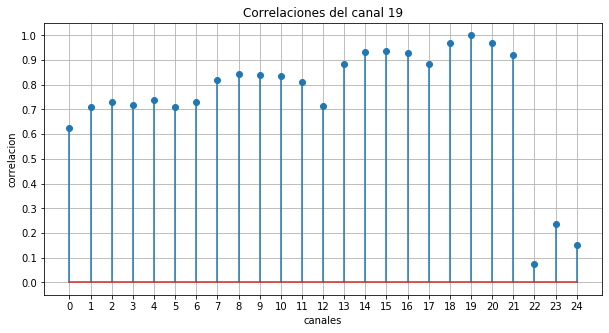

In [6]:
# cada fila (canal) es una variable
# cada columna (muestra) es una observacion
# de esta forma podemos ingresar la matrix canalesxmuestras directamente a corrcoef
corrs = np.corrcoef(eeg)

# la correlacion de interes está en la fila/columna correspondiente a mi canal
# ya que la matriz resultante es diagonal
# corrs[my_channel,:] - corrs[:,my_channel] es aproximadamente 0...

fig,ax = plt.subplots(1,1)
fig.set_size_inches((10,5))
ax.stem(corrs[my_channel,:]) # como las muestras van de 0 a num canales no es necesario pasarle el eje
ax.set_title('Correlaciones del canal '+ str(my_channel))
ax.set_xlabel('canales')
ax.set_ylabel('correlacion')
plt.grid()
plt.xticks(np.arange(0, eeg.shape[0]))
plt.yticks(np.arange(0, 1.1,0.1))
plt.show()

##### 3.1.2 ¿Cómo varia la correlación entre el canal que le corresponde y los demás canales?. Realice un breve análisis de lo observado.

En la siguiente imagen se ven las localizaciones:

<img align="left" style="width: 600px;" src="locs.png">

En esta gráfica vemos que los canales cercanos a 19 son:
- Cruz: 15,18,20,21
- Diagonales: 14,16

En efecto ademas del canal 19 los picos mas altos en orden son :

- Laterales : 18 y 20
- norte y sur: 15 y 21
- Diagonales superiores: 14 y 16

Esto se puede pensar como que la correlación decrementa de forma radial respecto al punto central.

Además en la grafica de correlación vemos que los canales 22,23 y 24 tiene muy baja correlación. 
Esto se debe a que los canales oculares tienen más componentes artefactuales (por ejemplo EMG) que componente de EEG.

Conclusiones

- Naturalmente la mayor correlacion está en el mismo canal.
- Luego los otros picos estan en los canales cercanos espacialmente a este. 
- Lo anterior es debido a que el potencial electrico es una función continua en el espacio por lo que se necesitan mantener voltages (y sus series temporales) similares en la vecindad de un punto.

#### 3.2 Funcion de autocorrelación de un canal

##### 3.2.1 Calcule la función de autocorrelación del canal que le corresponde, 
luego calcule la función de autocorrelación sobre uno de los canales de los ojos (canal 22 o 24), 
finalmente grafique y compare las dos funciones utilizando subplots. 

Sugerencia: Haga zoom sobre las señal de autocorrelación para observar mejor las diferencias.

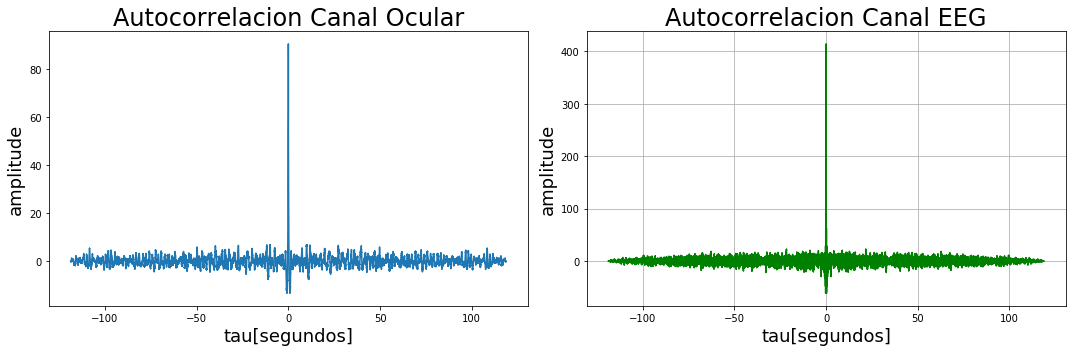

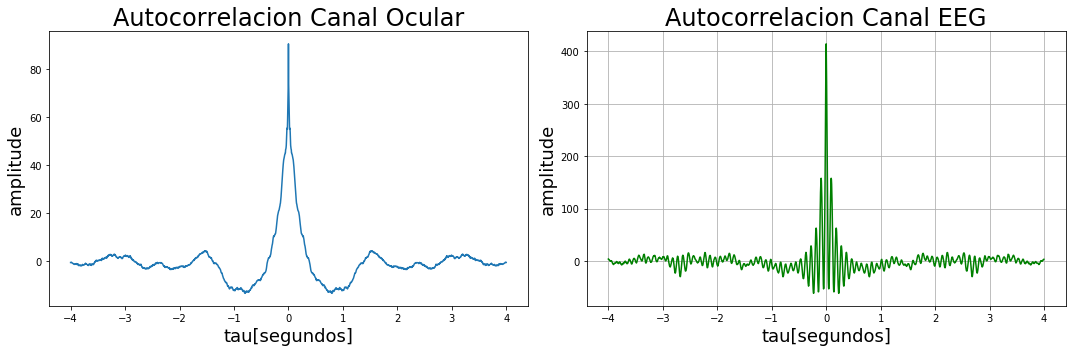

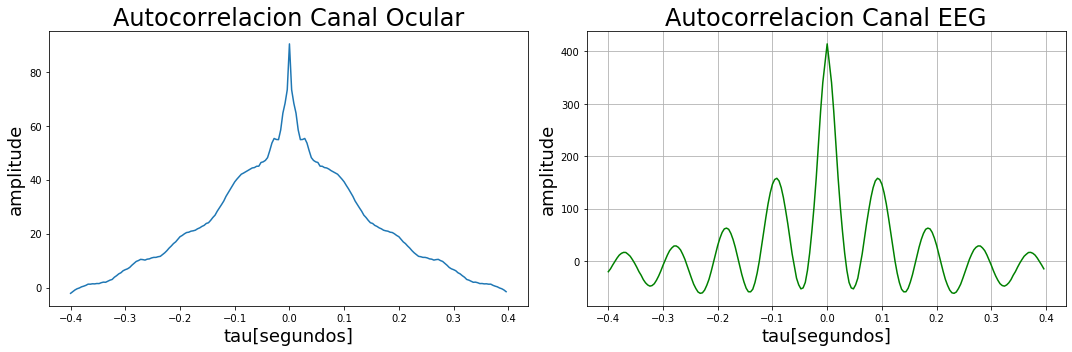

pseudoperiodo eeg 0.092
pseudoperiodo ocular 1.528


In [49]:
eye = 22
#autocorr_eye = np.correlate(raw[eye],raw[eye],mode='full')
#autocorr_eeg = np.correlate(raw[my_channel],raw[my_channel],mode='full')

autocorr_eye = np.correlate(eeg[eye],eeg[eye],mode='full')
autocorr_eeg = np.correlate(eeg[my_channel],eeg[my_channel],mode='full')

lag0= np.where(autocorr_eeg==np.max(autocorr_eeg))[0][0] # El maximo es el tiempo 0, este es su indice

# Build lag vector
positive=np.arange(0,autocorr_eeg.shape[0]-lag0)
negative=np.arange(-1*lag0,0)
lag_vector = np.hstack([negative,positive])
lag_vector = mu.f2s(lag_vector,fs) # para pasar de muestras a tiempo en segundos



# completo
start = 0
stop = len(autocorr_eye)
fig,axs = mu.plot_signal(lag_vector[start:stop],autocorr_eye[start:stop],xlabel='tau[segundos]',title='Autocorrelacion Canal Ocular',
                         ylabel='amplitude',ret=True,show=False,format='-',
                         subplots=(1,2),size=(15,5))
axs[1].plot(lag_vector[start:stop],autocorr_eeg[start:stop],'g-')
axs[1].set_title('Autocorrelacion Canal EEG',fontsize=24)
axs[1].set_xlabel('tau[segundos]',fontsize=18)
axs[1].set_ylabel('amplitude',fontsize=18)
plt.tight_layout()
plt.show()

#zoom

radii = 1000
start = lag0 - radii
stop = lag0 + radii

fig,axs = mu.plot_signal(lag_vector[start:stop],autocorr_eye[start:stop],xlabel='tau[segundos]',title='Autocorrelacion Canal Ocular',
                         ylabel='amplitude',ret=True,show=False,format='-',
                         subplots=(1,2),size=(15,5))
axs[1].plot(lag_vector[start:stop],autocorr_eeg[start:stop],'g-')
axs[1].set_title('Autocorrelacion Canal EEG',fontsize=24)
axs[1].set_xlabel('tau[segundos]',fontsize=18)
axs[1].set_ylabel('amplitude',fontsize=18)
plt.tight_layout()
plt.show()


#zoom

radii = 100
start = lag0 - radii
stop = lag0 + radii

fig,axs = mu.plot_signal(lag_vector[start:stop],autocorr_eye[start:stop],xlabel='tau[segundos]',title='Autocorrelacion Canal Ocular',
                         ylabel='amplitude',ret=True,show=False,format='-',
                         subplots=(1,2),size=(15,5))
axs[1].plot(lag_vector[start:stop],autocorr_eeg[start:stop],'g-')
axs[1].set_title('Autocorrelacion Canal EEG',fontsize=24)
axs[1].set_xlabel('tau[segundos]',fontsize=18)
axs[1].set_ylabel('amplitude',fontsize=18)
plt.tight_layout()
plt.show()

# Identificacion de periodicidad

def find_period(autocorr,fs,start,stop):
    x = autocorr.copy()
    t0 = np.argmax(x)
    start = mu.s2f(start,fs) + t0
    stop = mu.s2f(stop,fs) + t0
    left = np.argmin(x[start:stop]) + start
    period_idx = np.argmax(x[left:stop]) + left
    period = period_idx - t0
    period = mu.f2s(period,fs)
    return period

print('pseudoperiodo eeg',find_period(autocorr_eeg,fs,0,0.1))
print('pseudoperiodo ocular',find_period(autocorr_eye,fs,1,2))
#find_period(autocorr_eeg,fs,0.1,0.2)

##### 3.2.1 ¿Que observa?. Describa brevemente las gráficas obtenidas.

- Las gráficas de autocorrelación son simétricas

- La de EEG exhibe picos de periodicidad más suaves que los de EOG.

- La señal EEG muestra picos decadentes por lo que hay cierto nivel de periodicidad (sin embargo la señal no se repite exactamente).

- En particular luego del $tau = 0$ segundos, la latencia con mayor pico fue de $tau = 0.092$ segundos. Esto implica alrededor, es decir 11Hz de frecuencia. Es de notar que 10Hz es una frecuencia neuronal común conocida como el ritmo alfa, entonces es posible que lo que hallamos detectado sea este ritmo.

- Los otros picos de la autocorrelación del eeg pueden corresponder a multiplos de la frecuencia fundamental encontrada o a otros ritmos neuronales del eeg menos prominentes.

- La componente ocular muestra una leve periodicidad a los 1.528 segundos (0.65Hz). Es posible que estos sean los parpadeos ya que el reposo se hizo a ojos abiertos. Sin embargo un periodo de parpadeo de 1.5 segundos es muy rápido.

- El ruido de una señal puede enmascarar su periodicidad por lo que se muestran picos decadentes en señales periodicas con ruido.

- En general los canales oculares tienen mayores valores de voltage ya que una señal electrica muscular es mucho mayor que una de EEG. Esto quiere decir que deberían tener mayor energía. Sin embargo lo anterior no se ve en las graficas de autocorrelación mostradas ya que ambas fueron escaladas al rango [-1,1]. De hacerse con los datos originales es probable que la señal ocular tenga un pico mucho mas grande que la de EEG en tau=0.

### 4 Conclusiones Generales

- En la autocorrelación el pico más grande estará en tau=0s debido a que se compara la señal con una copia exacta de ella.
- Si la señal no es periodica no se observarán picos prominentes en la autocorrelación, sino que está ira decayendo.
- Si la señal tiene cierta periodicidad (o pseudoperiodicidad) se verán picos en ciertos valores de tau que corresponden al periodo o a multiplos de este.
- Los picos serán de la misma altura que el pico de tau=0 solo si la señal es exactamente periodica.
- Para el resto de señales que son periodicas pero que presentan ruido los picos de periodicidad irán disminuyendo.
- Haciendo uso de la correlación cruzada podemos recuperar señales en medios ruidosos y con desfases/retrasos.
- El nivel DC se puede calcular como el promedio de una señal.
- Una señal que deba ser continua a través del espacio deberá parecerse a las señales vecinas y esto se verá reflejado en la correlación cruzada entre ellas.
- Es posible usar la correlación cruzada entre señales que sabemos de antemano que deben parecerse para identificar señales atípicas.
- Es posible usar la autocorrelación para sacar el periodo (o pseudoperiodo) de una señal; el siguiente pico luego de tau=0 correspondera a este.
